In [32]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


def image_normalize(img_i, sigma=1):
    """
    @param img_i: image to normalize
    @param sigma: value to multiply
    """
    nr, nc, nb = img_i.shape
    print(img_i.shape)
    img_n = np.zeros(shape=(nr, nc, nb))
    for i in range(nb):
        one_band = img_i[:, :, i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        ma = 2200
        print(mi, ma, np.finfo(float).eps)
        one_band = (one_band - mi) / (ma - mi + np.finfo(float).eps)
        img_n[:, :, i] = sigma * one_band
    return img_n


def image_normalize_ndvi(img_i, sigma=1):
    """
    @param img_i: image to normalize
    @param sigma: value to multiply
    """
    nr, nc, nb = img_i.shape
    print(img_i.shape)
    img_n = np.zeros(shape=(nr, nc, nb))
    for i in range(nb):
        one_band = img_i[:, :, i]
        mi = -1
        ma = 1
        print(mi, ma, np.finfo(float).eps)
        one_band = (one_band - mi) / (ma - mi + np.finfo(float).eps)
        img_n[:, :, i] = sigma * one_band
    return img_n

In [35]:
with rasterio.open("Enschede-surroundings/enschede-diff-20180702-20180806.tif", 'r') as ds:
    img_diff_07Jun_02Jul_2018 = ds.read()  # read all raster values
img_diff_07Jun_02Jul_2018 = np.transpose(img_diff_07Jun_02Jul_2018, [1, 2, 0])  # numpy array [row, col, bands]
# img_20170719_rgb = img_20170719[:, :, [3, 2, 1]]
# img_20170719_ndvi = img_20170719[:, :, [23]]
# img_20170719_cvi = img_20170719[:, :, [25]]
img_diff_07Jun_02Jul_2018_ndvi = img_diff_07Jun_02Jul_2018[:, :, [0]]
img_diff_07Jun_02Jul_2018_ndvi.shape

(340, 388, 1)

(340, 388, 1)
-1 1 2.220446049250313e-16


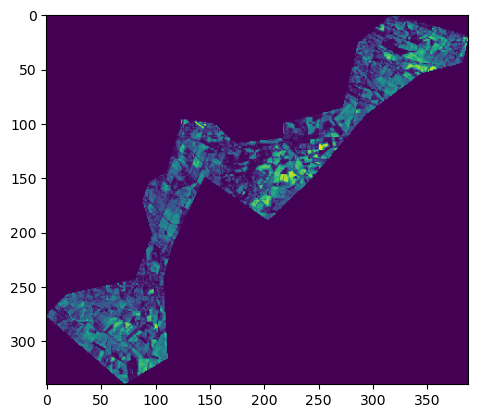

In [39]:
plt.imshow(image_normalize_ndvi(img_diff_07Jun_02Jul_2018_ndvi,1))

(340, 388, 3)
(131920, 3)
(340, 388)


/Users/hungnguyen/miniforge3/envs/DS-CVassignment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


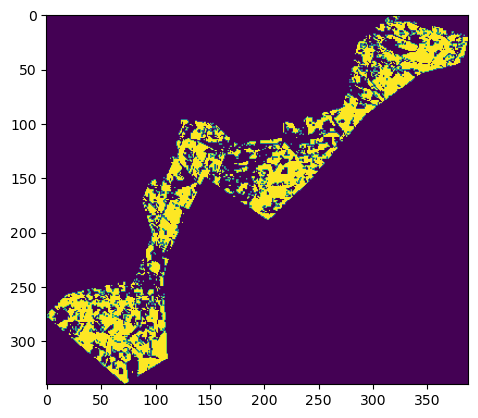

In [40]:
from sklearn.cluster import KMeans

#The -1 in the reshape() function specifies that the new shape should be determined based on the size of the original array and the size of the last dimension

print(img_diff_07Jun_02Jul_2018.shape)
img_reshaped = img_diff_07Jun_02Jul_2018.reshape(-1, img_diff_07Jun_02Jul_2018.shape[-1])
print(img_reshaped.shape)
kmeans = KMeans(n_clusters=2, max_iter=10000)
labels = kmeans.fit_predict(img_reshaped)
labels_back = labels.reshape(img_diff_07Jun_02Jul_2018.shape[0], img_diff_07Jun_02Jul_2018.shape[1])
print(labels_back.shape)
plt.imshow(labels_back)
plt.show()
